In [2]:
import numpy as np
import pandas as pd
from matplotlib.pyplot import cm 
import matplotlib.pyplot as plt

from src.decodertools import * 

### 1. Generate the circuit 

### 2. Sample from the circuit to obtain a logical error rate 

In [10]:
results = []
distances = [7, 9, 11, 13]
pauli_noise = np.linspace(0.003, 0.005, 20)

for d in distances:
    print('Sampling for distance ' + str(d))
    for p in pauli_noise: 
        ler = ler_sample_from_subsystem_surface_code(distance=d,
                                                      num_shots=10000,
                                                      noise_params=[p,p,p,p],
                                                      rounds=d, 
                                                      )
        results.append({'d':d, 'p_pauli':p, 'ler':ler})
        
output_file = 'data/subsystem_surface_code.csv' 

results_df = pd.DataFrame(results)
results_df.to_csv(output_file, index=False)

Sampling for distance 7
Sampling for distance 9
Sampling for distance 11
Sampling for distance 13


### 3. Plot the threshold using fitting tools 

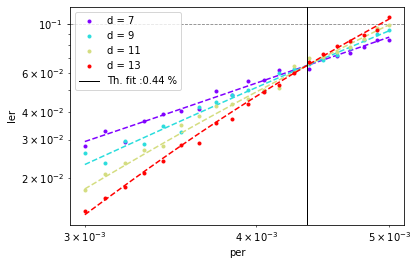

In [16]:
df = pd.read_csv('data/subsystem_surface_code.csv')
# df = df.loc[df['p_pauli'] > 0.01]

color = cm.rainbow(np.linspace(0, 1, len(np.unique(df['d']))))

sizes = np.unique(df['d'])
xdata = df[['d', 'p_pauli']].T.values
ydata = df[['ler']].values.flatten()
fit_data = get_fit_params(xdata, ydata, params_0=[1,1,1,1,1])

for d, c in zip(sizes, color):

    dfd = df.loc[df['d'] == d]
    plt.plot(dfd['p_pauli'], dfd['ler'],'.', c=c, label=f'd = {d}')
    plt.plot(dfd['p_pauli'], get_fit_data(d, dfd['p_pauli'], fit_data), '--', c=c)

plt.loglog()
plt.axvline(x=fit_data[0], linewidth=1, color='k', label=f'Th. fit :{round(fit_data[0]*100, 2)} %')
plt.grid(color='gray', linestyle='dashed')
plt.xlabel('per')
plt.ylabel('ler')
# plt.title(r'Logical error rate ')
plt.savefig('data/noisy_all_p_subsystem_surface_code.png')
plt.legend()